In [6]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [7]:
dataB = pd.read_csv("business.csv")
dfb= pd.DataFrame(dataB)
dfb["class"]="business"
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        93487 non-null  object
 1   airline     93487 non-null  object
 2   ch_code     93487 non-null  object
 3   num_code    93487 non-null  int64 
 4   dep_time    93487 non-null  object
 5   from        93487 non-null  object
 6   time_taken  93487 non-null  object
 7   stop        93487 non-null  object
 8   arr_time    93487 non-null  object
 9   to          93487 non-null  object
 10  price       93487 non-null  object
 11  class       93487 non-null  object
dtypes: int64(1), object(11)
memory usage: 8.6+ MB


In [8]:
dataE = pd.read_csv("economy.csv")
dfe= pd.DataFrame(dataE)
dfe["class"]="economy"
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        206774 non-null  object
 1   airline     206774 non-null  object
 2   ch_code     206774 non-null  object
 3   num_code    206774 non-null  int64 
 4   dep_time    206774 non-null  object
 5   from        206774 non-null  object
 6   time_taken  206774 non-null  object
 7   stop        206774 non-null  object
 8   arr_time    206774 non-null  object
 9   to          206774 non-null  object
 10  price       206774 non-null  object
 11  class       206774 non-null  object
dtypes: int64(1), object(11)
memory usage: 18.9+ MB


# 1. **Verileri Birleştirme ve Temizleme**

In [9]:
# business ve economy class verilerini birleştirme 
# clean_dataset olsa bile kendim birleştirip veriler üzerinde düzenleme işlemlerini yapmak istedim.

df = pd.concat([dfe, dfb]).drop_duplicates(keep=False) 
df

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy
...,...,...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"69,265",business
93483,31-03-2022,Vistara,UK,826,12:30,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"77,105",business
93484,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"79,099",business
93485,31-03-2022,Vistara,UK,828,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"81,585",business


In [10]:
## ch_code ile num_code sütunlarını birleştirip flight sütununa atama
df["flight"] = df["ch_code"].str.cat(df["num_code"].astype(str), sep="-") 
df["flight"]

0        SG-8709
1        SG-8157
2         I5-764
3         UK-995
4         UK-963
          ...   
93482     UK-822
93483     UK-826
93484     UK-832
93485     UK-828
93486     UK-822
Name: flight, Length: 300257, dtype: object

In [11]:
df=df.drop(columns=["ch_code","num_code"])

In [12]:
df.rename(columns={"from":"dep_city","to":"arrival_city"},inplace=True)

In [13]:
df["date"] = pd.to_datetime(df["date"], dayfirst=True)

In [14]:
today=df['date'].sort_values().values[0]
today

np.datetime64('2022-02-11T00:00:00.000000000')

In [15]:
df["days_left"] = (df["date"]- today ).dt.days #days_left sütununa kaç gün kaldığını yazdırmak 

In [16]:
df.drop(columns="date",inplace=True)

In [17]:
# sütun sıralamasını ayarlama
columns= list(df.columns)
columns = ['airline','flight','dep_city','dep_time','time_taken','stop','arr_time', 'arrival_city','class','price','days_left']
df= df[columns]
df

,airline,flight,dep_city,dep_time,time_taken,stop,arr_time,arrival_city,class,price,days_left
0,SpiceJet,SG-8709,Delhi,18:55,02h 10m,non-stop,21:05,Mumbai,economy,"5,953",0
1,SpiceJet,SG-8157,Delhi,06:20,02h 20m,non-stop,08:40,Mumbai,economy,"5,953",0
2,AirAsia,I5-764,Delhi,04:25,02h 10m,non-stop,06:35,Mumbai,economy,"5,956",0
3,Vistara,UK-995,Delhi,10:20,02h 15m,non-stop,12:35,Mumbai,economy,"5,955",0
4,Vistara,UK-963,Delhi,08:50,02h 20m,non-stop,11:10,Mumbai,economy,"5,955",0
...,...,...,...,...,...,...,...,...,...,...,...
93482,Vistara,UK-822,Chennai,09:45,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,business,"69,265",48
93483,Vistara,UK-826,Chennai,12:30,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,business,"77,105",48
93484,Vistara,UK-832,Chennai,07:05,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,business,"79,099",48
93485,Vistara,UK-828,Chennai,07:00,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,business,"81,585",48


## 1.1 Temizleme Fonksiyonları 

In [18]:
# stop değerlerini Temizleme fonksiyonu
def clean_stop_value(value):
    if "non-stop" in value:
        return "non-stop"
    elif "2+-stop" in value:
        return "2+"
    elif "1-stop" in value:
        return "1"
    else:
        return "unknown"

df['stop'] = df['stop'].apply(clean_stop_value)

In [19]:
# bekleme zamanını floata çeviren fonksiyon 
def time_to_float(time_str):
    # Saat ve dakika değerlerini ayır
    time_str = time_str.replace(" ", "") #boşlukları kaldırıyoruz
    hours = time_str.split('h')[0]  # out: ["13" ," 50m"]
    ## bazı saat değerleri ondalıklı olarak verilmiş 1.02h  gibi bunları direkt ekliyoruz
    ## clean_Dataset te bu verileri çıkartmışlar ben eklemek istedim. 
    if "." in hours:
        return hours
    else:
        minutes = int(time_str.split('h')[1].split('m')[0]) # [" 50","m"] şeklinde oluyor bunun ilk indexini alıp inte çeviriyoz. 
        return int(hours) +(minutes / 60)
    # Float cinsine çevir (dakikaları saatlere çevirip ekle)
       
df["time_taken"]=df["time_taken"].apply(time_to_float)

In [20]:
def deleteComma(comma):
    comma=comma.replace(",","")
    return comma
    
df["price"]=df["price"].apply(deleteComma)


In [21]:
# kategorik ama sayısal değerde olan sütunları numeric veri tipine çeviriyorum
df["price"]= pd.to_numeric(df["price"])
df["time_taken"]= pd.to_numeric(df["time_taken"])

In [22]:
#veri setinde 300 000 veri vardı bunlardan rastgele 100 000 tanesini alıyoruz.

df_sample = df.sample(n=100000,random_state=37)
df_sample.reset_index(inplace=True,drop=True)
df=df_sample

## 1.2 Eksik veri oluşturma

In [23]:
# Veri setinde rasgele eksik veriler oluşturalım.

import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

# 2. Keşifsel Veri Analizi | EDA(Exploratory Data Analysis) |  

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   airline       97064 non-null  object 
 1   flight        97068 non-null  object 
 2   dep_city      97144 non-null  object 
 3   dep_time      97075 non-null  object 
 4   time_taken    97114 non-null  float64
 5   stop          97036 non-null  object 
 6   arr_time      96861 non-null  object 
 7   arrival_city  96997 non-null  object 
 8   class         97183 non-null  object 
 9   price         96976 non-null  float64
 10  days_left     96984 non-null  float64
dtypes: float64(3), object(8)
memory usage: 8.4+ MB


In [25]:
df.head(10)

,airline,flight,dep_city,dep_time,time_taken,stop,arr_time,arrival_city,class,price,days_left
0,Indigo,6E-244,Chennai,04:00,6.583333,1,10:35,Kolkata,economy,6869.0,9.0
1,Air India,AI-543,Hyderabad,11:20,NaN,1,21:15,Mumbai,economy,7774.0,4.0
2,GO FIRST,G8-102,Kolkata,14:20,2.583333,non-stop,16:55,Delhi,economy,3999.0,41.0
3,Vistara,UK-720,Kolkata,07:10,6.833333,1,14:00,Mumbai,economy,12210.0,3.0
4,Vistara,UK-941,NaN,16:45,15.083333,1,07:50,Hyderabad,business,47217.0,26.0
5,Air India,AI-808,Bangalore,21:00,12.083333,1,09:05,Mumbai,economy,9277.0,3.0
6,NaN,6E-354,Mumbai,12:45,6.833333,1,19:35,Bangalore,economy,6473.0,NaN
7,Vistara,UK-951,Delhi,14:20,6.583333,1,20:55,Hyderabad,business,NaN,6.0
8,Air India,AI-663,Mumbai,13:25,14.250000,1,03:40,Delhi,economy,6248.0,40.0
9,Indigo,6E-354,Mumbai,12:45,6.833333,1,19:35,NaN,economy,4056.0,28.0


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time_taken,97114.0,12.202511,7.187070,0.833333,6.75,11.25,16.166667,49.833333
price,96976.0,20935.676724,22713.547774,1105.000000,4762.00,7433.00,42521.000000,123071.000000
days_left,96984.0,25.064660,13.564080,0.000000,14.00,25.00,37.000000,48.000000


## 2.0 Eksik Değerlerin Analizi

In [27]:
df.isna().sum()

airline         2936
flight          2932
dep_city        2856
dep_time        2925
time_taken      2886
stop            2964
arr_time        3139
arrival_city    3003
class           2817
price           3024
days_left       3016
dtype: int64

In [28]:
# verilerin NaN olduğu değerlere baktığımızda çoğu sütundaki verileri tahmin etmemiz neredeyse mümkün olmadığından 
# burdaki NaN değer olan satırları veri setinden kaldırıyorum
df.dropna(subset=["airline","flight","dep_city","dep_time","time_taken","arr_time","arrival_city","class","days_left"], inplace=True)

In [29]:
df["stop"].value_counts()

stop
1           61815
non-stop     8978
2+           3368
Name: count, dtype: int64

In [30]:
# durak değerlerine baktığımızda en çok tekrar eden değer olan 1 ile dolduruyorum NaN değerleri
df["stop"].fillna(df["stop"].value_counts().index[0],inplace=True)

In [31]:
# fiyat sütunundaki NaN değerleri "ortalama" değeriyle dolduruyorum.
df["price"].fillna(df["price"].mean(),inplace=True)

In [32]:
df.isna().sum()

airline         0
flight          0
dep_city        0
dep_time        0
time_taken      0
stop            0
arr_time        0
arrival_city    0
class           0
price           0
days_left       0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76405 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   airline       76405 non-null  object 
 1   flight        76405 non-null  object 
 2   dep_city      76405 non-null  object 
 3   dep_time      76405 non-null  object 
 4   time_taken    76405 non-null  float64
 5   stop          76405 non-null  object 
 6   arr_time      76405 non-null  object 
 7   arrival_city  76405 non-null  object 
 8   class         76405 non-null  object 
 9   price         76405 non-null  float64
 10  days_left     76405 non-null  float64
dtypes: float64(3), object(8)
memory usage: 7.0+ MB


## 2.1 Sayısal Değerlerin Analizi

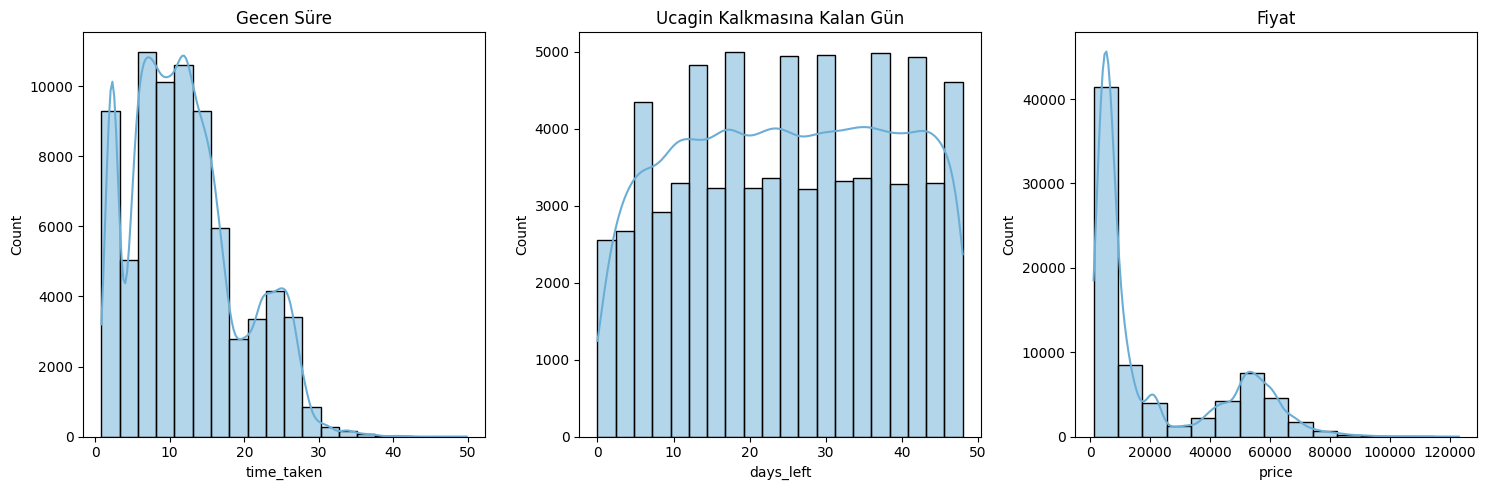

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5)) # fig:ana figur  axes: alt grafiklerin eksenleri axes[0],axes[1] şeklinde erişilir
colors = sns.color_palette('Blues', 3) #Seaborn'un "Blues" renk paletinden 3 renk alır.

sns.histplot(df['time_taken'], ax=axes[0],color=colors[1],kde=True, bins=20) # kde: yoğunluk eğrisi (Kernel Density Estimation) ekler.
axes[0].set_title('Gecen Süre')
sns.histplot(df['days_left'], ax=axes[1], kde=True, color=colors[1], bins=20)
axes[1].set_title('Ucagin Kalkmasına Kalan Gün')

sns.histplot(df['price'], ax=axes[2], kde=True, color=colors[1], bins=15)
axes[2].set_title('Fiyat')

plt.tight_layout()
plt.show()

> - Gerkçekleşen uçuşların çoğu 5 saatten fazla sürmektedir.   
> - Uçuşların fiyatlarının yaklaşık %60'ı 15000'in altındadır .

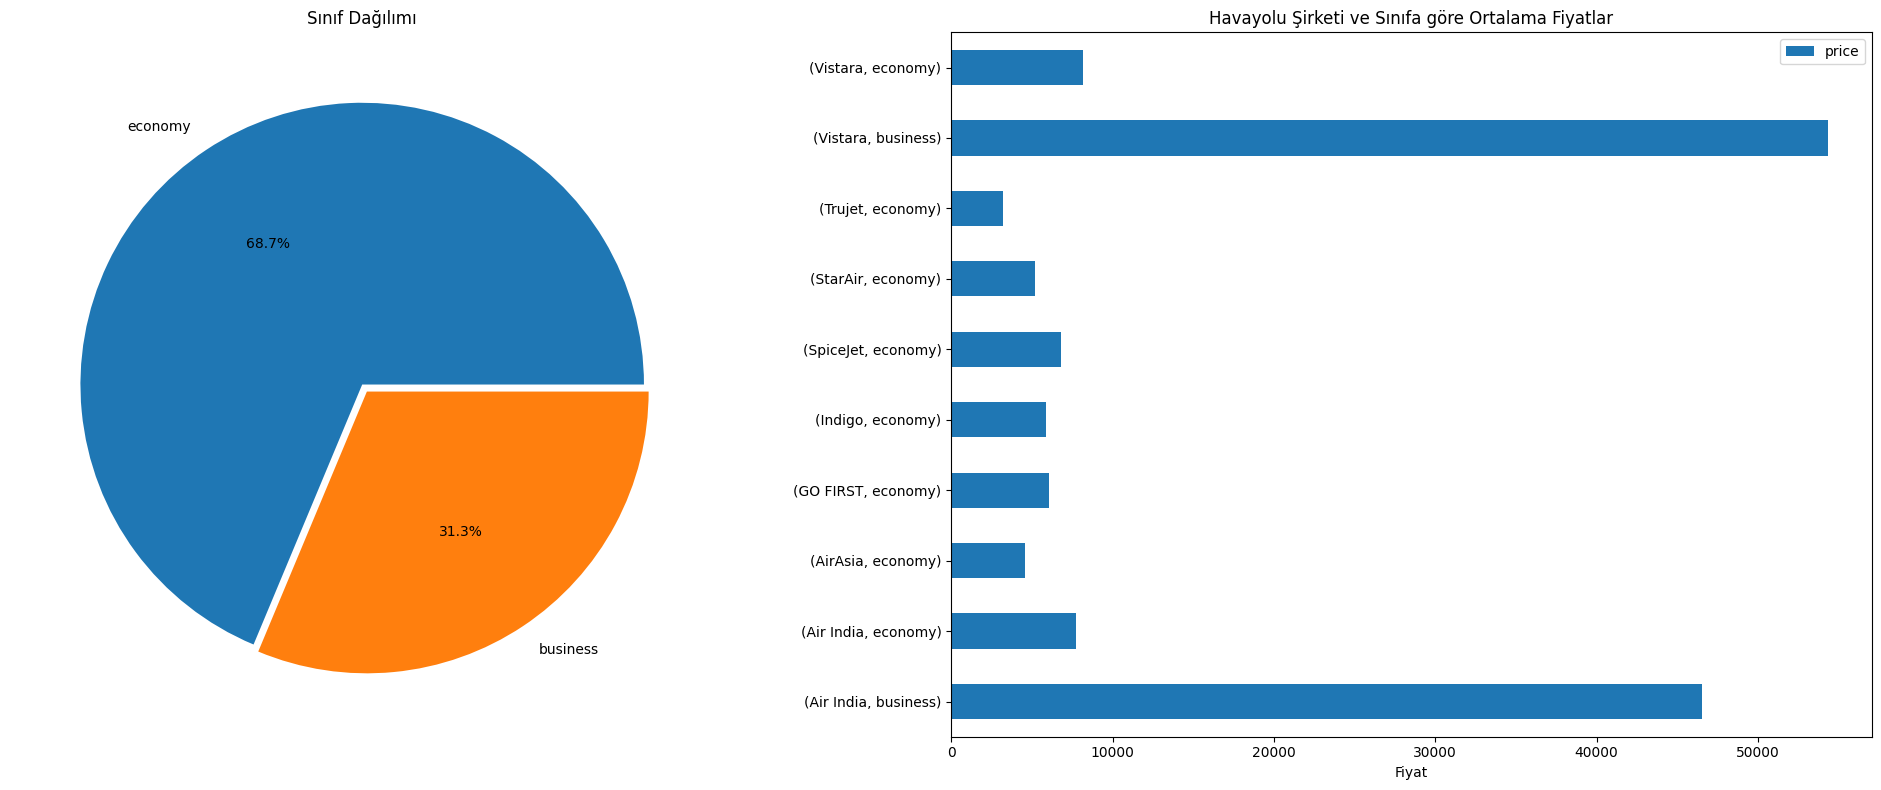

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # 1 satır 2 tane sütun

# Sınıf dağılımı Pasta grafiği
axes[0].pie(
    labels=df["class"].value_counts().index,
    x=df["class"].value_counts().values,
    explode=[0, 0.03],  #  pastadaki değerler arasındaki boşluk
    autopct='%1.1f%%')

axes[0].set_title("Sınıf Dağılımı")


gb1 = df.groupby(["airline","class"])[["price"]].mean()
gb1.plot(kind="barh", stacked=True,ax= axes[1])

axes[1].set_title("Havayolu Şirketi ve Sınıfa göre Ortalama Fiyatlar")
axes[1].set_ylabel("")
axes[1].set_xlabel("Fiyat")


plt.tight_layout()  # Adjust layout for better spacing
#plt.title('Sınıf Dağılımı')
plt.show()

> - Gerçekleşen uçuşların büyük bir çoğunluğu ekonomi sınıfında gerçekleşmiş.
> - Ekonomi sınıfındaki uçuşlarda Havayolu şirketleri benzer fiyatlar vermektedir.Fakat en düşük fiyat Trujet firmasıdır.
> - Business sınıfındaki uçuşlarda  "Vistara" havayolu "Air_india" havayolundan daha pahalıdır.

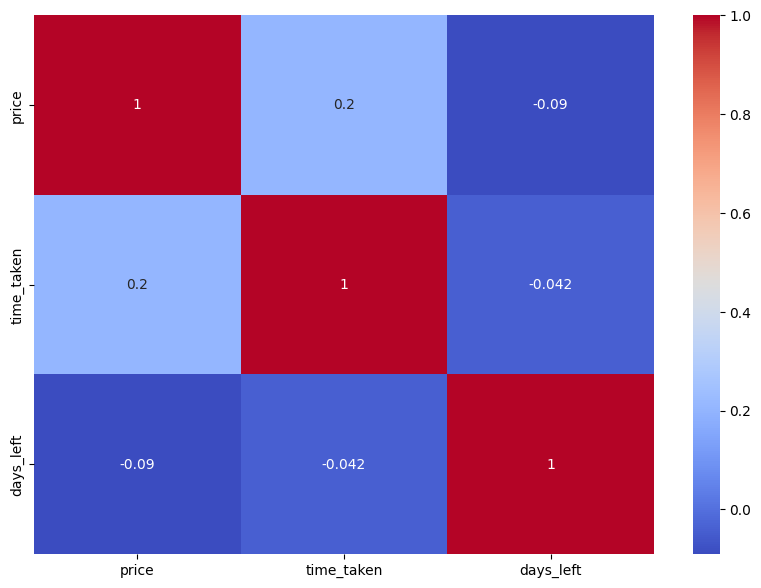

In [45]:
# sayısal değerler arasında bir korelasyon var mı diye heatmape bakıyoruz.  
plt.figure(figsize = (10, 7))
sns.heatmap( df[['price', 'time_taken', 'days_left',]].corr(), annot = True, cmap = "coolwarm")
plt.show()


> - Numerik değerler arasında herhangi anlamlı bir korelasyon yoktur.  

## ---Şehirlere Göre Fiyat Dağılımı 

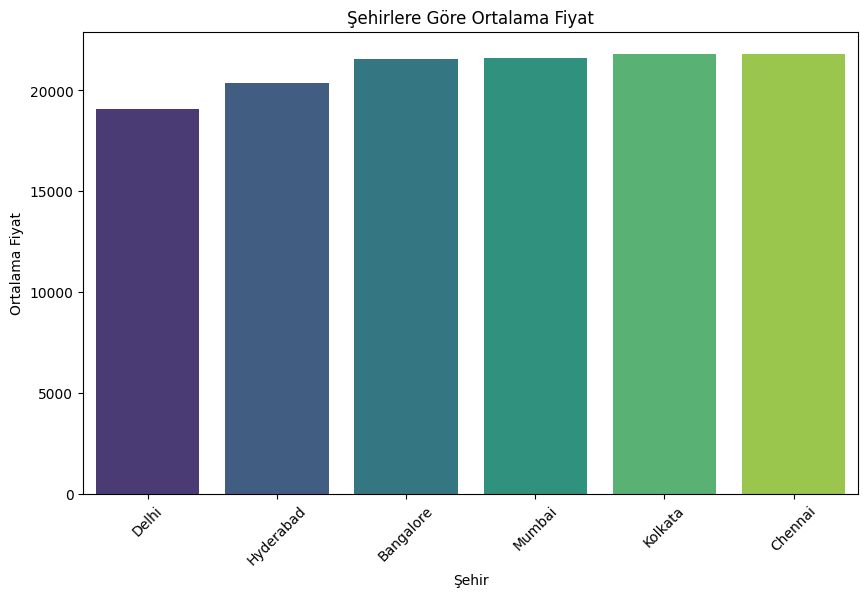

In [36]:
# Şehirlere göre fiyat dağılımı
city_prices = df.groupby('dep_city')['price'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=city_prices.index, y=city_prices.values, palette='viridis')
plt.title('Şehirlere Göre Ortalama Fiyat')
plt.xlabel('Şehir')
plt.ylabel('Ortalama Fiyat')
plt.xticks(rotation=45)
plt.show()

> - Şehirlere göre ortalama fiyatlar birbirine yakın değerlerdedir.

## ---Havayolu Bazında Ortalama Uçuş Süresi

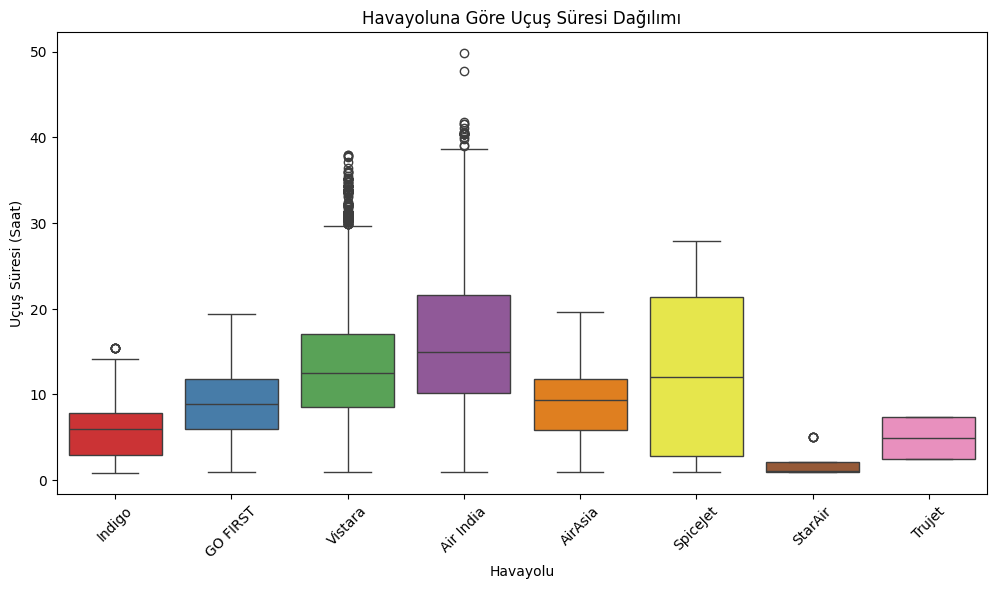

In [37]:
# havayolunun uçuş süresi üzerindeki etkisi
plt.figure(figsize=(12, 6))
sns.boxplot(x='airline', y='time_taken', data=df, palette='Set1')
plt.title('Havayoluna Göre Uçuş Süresi Dağılımı')
plt.xlabel('Havayolu')
plt.ylabel('Uçuş Süresi (Saat)')
plt.xticks(rotation=45)
plt.show()

> - StarAir, Trujet, Indigo görece daha kısa uçuş süreleri sunmaktadır. 

## ? Uçuştan 1-2 gün önce alınan biletler daha mı ucuzdur?

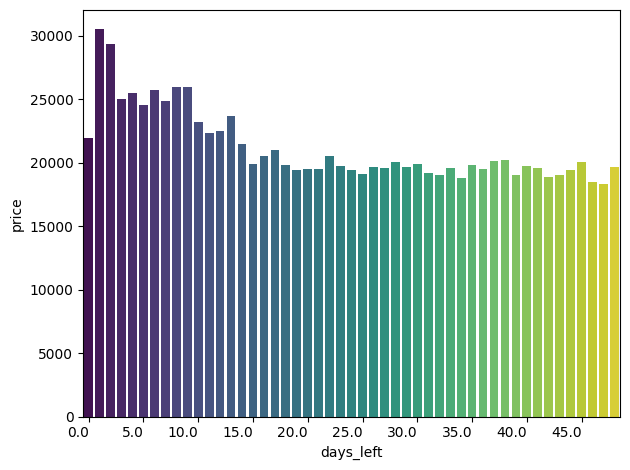

In [38]:
gb2 = df.groupby("days_left")[["price"]].mean()

sns.barplot(x=gb2.index,y=gb2["price"],palette='viridis')
# X ekseninde her 5. indeksi göstermek için kullandık.  [0,5,10,15,20,25,30,50] şeklinde kendimiz de verebilirdik. 
plt.xticks(np.arange(0,len(gb2),step=5), ha='right')  

plt.tight_layout()  
plt.show()

> - Görüldüğü üzere Uçak biletleri son hafta içinde en yüksek fiyatında satılıyor fakat son gün fiyatı düşmeye başlıyor. 

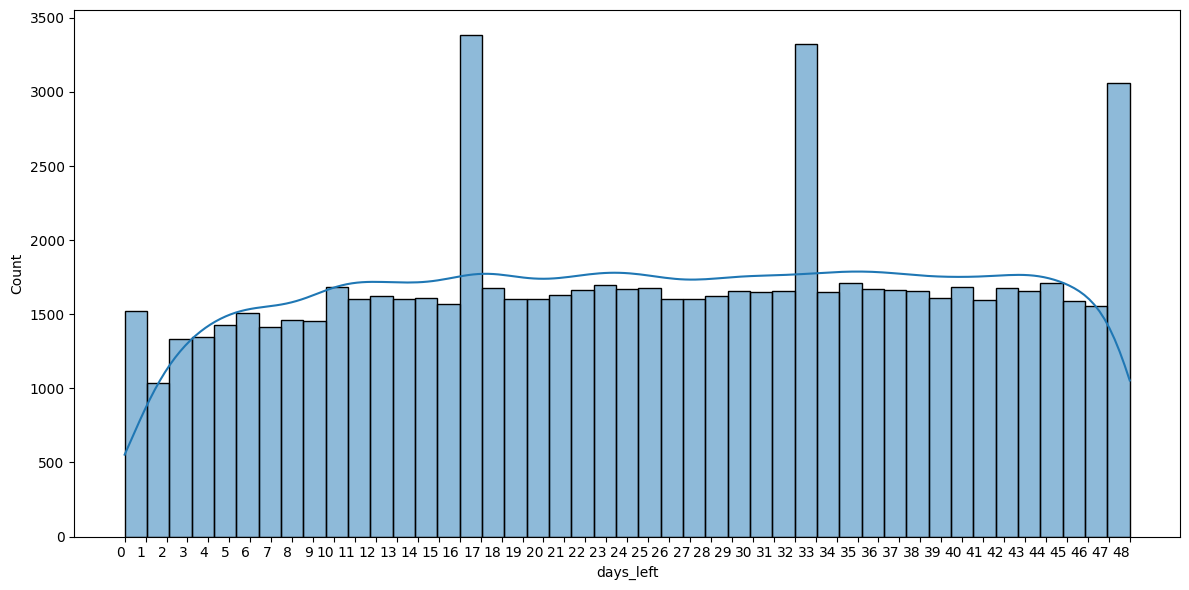

In [39]:
plt.figure(figsize=(12, 6))
sns.histplot(x=df["days_left"],kde=True)

plt.xticks(df["days_left"].unique(),ha='right')

plt.tight_layout()
plt.show()

> - Çoğu müşteri biletlerini en az 1 hafta önce almayı tercih ediyor. 